In [2]:
import pandas as pd
import ast
# matplotlib 폰트설정
import matplotlib.pyplot as plt
# https://github.com/killiansheriff/LovelyPlots
# plt.style.use(['ipynb','use_mathtext','colors5-light'])
plt.rc('font', family='NanumGothic')
# print(plt.rcParams['font.family'])
plt.rcParams["figure.dpi"] = 240 # DPI 고화질로 향상

from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multitest import multipletests
import scipy.stats

In [3]:
ref_08_19 = pd.read_excel('./2008_2019_한국현대문학_참고문헌_lod_merge.xlsx')
ref_20_21 = pd.read_excel('./2020_2021_한국현대문학_참고문헌_라벨링.xlsx')
foucault_cls = pd.read_excel('./2008_2019_한국현대문학_참고문헌_lod_merge.xlsx', sheet_name='푸코 책 목록')

In [3]:
# 컬럼 확인
ref_08_19.columns

Index(['refebibl-id', 'artiId', 'type-code', 'type-name', 'title', 'author',
       'pubilisher', 'pubi-year', 'page', 'arti-id', 'journal-name', 'volume',
       'isseue', 'serno', 'doi', 'degree', 'university', 'department', 'url',
       'citation-day', 'site-name', 'registration-day', 'conference-name',
       'uri', 'lod_author', 'lod_author_id', 'lod_publisher', 'lod_label',
       'lod_alternative', 'classification'],
      dtype='object')

In [4]:
def str_to_list(str):
    try:
        return ast.literal_eval(str)
    except:
        return str

In [5]:
ref_08_19['lod_author'] = ref_08_19['lod_author'].map(lambda x:str_to_list(x))

In [6]:
# 컬럼 확인
ref_20_21.columns

Index(['refebibl-id', 'artiId', 'type-code', 'type-name', 'title', 'author',
       'lod_author', 'uri', 'pubilisher', 'pubi-year', 'page', 'arti-id',
       'journal-name', 'volume', 'isseue', 'serno', 'doi', 'degree',
       'university', 'department', 'url', 'citation-day', 'site-name',
       'registration-day', 'conference-name', 'classification'],
      dtype='object')

In [7]:
need_cols= ['refebibl-id', 'artiId', 'type-code', 'type-name', 'title', 'uri', 'author','lod_author', 'classification',
       'pubilisher', 'pubi-year', 'page', 'arti-id', 'journal-name', 'volume',
       'isseue', 'serno', 'doi', 'degree', 'university', 'department', 'url',
       'citation-day', 'site-name', 'registration-day', 'conference-name']

In [8]:
# merge with need cols
ref_df = pd.concat([ref_08_19[need_cols],ref_20_21[need_cols]],ignore_index=True)

In [9]:
len(ref_df)

326565

In [31]:
def find_focau(row):
    if type(row)==list:
        if 'Foucault, Michel' in row:
            return 'Foucault, Michel'
        else:
            row
    else:
        return row

In [32]:
ref_df['lod_author'] = ref_df['lod_author'].map(lambda x:find_focau(x))

In [33]:
author_count = ref_df['author'].value_counts()
author_count

author
김윤식              3583
권영민              1011
김재용               947
이광수               915
김현                881
                 ... 
서울특별시 용산구           1
진영태                 1
Lee, Peter H.       1
김성언                 1
ZYX                 1
Name: count, Length: 54091, dtype: int64

In [88]:
# author_count.to_excel('./2008_2021_저자인용.xlsx')

In [34]:
ref_fu = ref_df[ref_df['lod_author']=='Foucault, Michel']
ref_fu = ref_fu[ref_fu['classification']!=0].reset_index(drop=True)
ref_fu

,refebibl-id,artiId,type-code,type-name,title,uri,author,lod_author,classification,pubilisher,...,serno,doi,degree,university,department,url,citation-day,site-name,registration-day,conference-name
0,REF021919443,ART001422634,3,단행본,"“사회를 보호해야 한다”:1976, 콜레주 드 프랑스에서의 강의",http://lod.nl.go.kr/resource/KMO199905885,미셸 푸코,"Foucault, Michel",2.0,동문선,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,REF019445810,ART001351822,3,단행본,4장 Questions on Geography in : Power/Knowledge,http://lod.nl.go.kr/resource/KMO199500811,Michel Foucault,"Foucault, Michel",2.0,The Harvest Press,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,REF040740322,ART002096865,3,단행본,감시와 처벌,http://lod.nl.go.kr/resource/KJU200904362,"Foucault, Michel","Foucault, Michel",2.0,나남출판사,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,REF040739677,ART002118941,3,단행본,감시와 처벌,http://lod.nl.go.kr/resource/KJU200904362,"Foucault, Michel","Foucault, Michel",2.0,나남출판사,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,REF044717581,ART002301010,3,단행본,감시와 처벌,http://lod.nl.go.kr/resource/KJU200904362,"Foucault, Michel","Foucault, Michel",2.0,나남,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,REF056328409,ART002669398,3,단행본,性의 歷史 1,http://lod.nl.go.kr/resource/KMO199003738,Michel Foucault,"Foucault, Michel",2.0,나남출판,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,REF057938025,ART002692553,3,단행본,성의 역사 1 앎의 의지,http://lod.nl.go.kr/resource/KMO199003738,Michel Foucault,"Foucault, Michel",2.0,나남,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,REF058208575,ART002734775,3,단행본,헤테로토피아,http://lod.nl.go.kr/resource/KMO201442004,Michel Foucault,"Foucault, Michel",1.0,문학과 지성사,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,REF058080819,ART002743915,3,단행본,헤테로토피아,http://lod.nl.go.kr/resource/KMO201442004,Michel Foucault,"Foucault, Michel",1.0,문학과지성사,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ref_df.columns

Index(['refebibl-id', 'artiId', 'type-code', 'type-name', 'title', 'uri',
       'author', 'lod_author', 'classification', 'pubilisher', 'pubi-year',
       'page', 'arti-id', 'journal-name', 'volume', 'isseue', 'serno', 'doi',
       'degree', 'university', 'department', 'url', 'citation-day',
       'site-name', 'registration-day', 'conference-name'],
      dtype='object')

In [36]:
ref_df['artiId'].nunique()

11941

In [37]:
ref_fu['artiId'].nunique()

624

In [38]:
ref_fu['classification'].value_counts()

classification
2.0    412
1.0    297
3.0     83
4.0     34
Name: count, dtype: int64

### 논문 + 연구자 데이터 merge

In [39]:
kci_liter = pd.read_excel('../Code//KCI/230312_kci_liter_김윤식 인용.xlsx')

In [41]:
# 2008~
kci_liter = kci_liter[kci_liter['year']>=2008].reset_index(drop=True)

In [42]:
kci_liter_20_21 = pd.read_excel('../Data/인문학 분야의 등재지_등재후보지 논문 데이터/한국현대문학/2020_2021_한국현대문학_라벨링_논문상세API_KRI.xlsx')
kci_liter_20_21 = kci_liter_20_21.drop(columns='현대문학')

In [43]:
# kri_num 없는 행 (추가 수집)
len(kci_liter_20_21[pd.isna(kci_liter_20_21['kri_num'])])

265

In [24]:
# kri 추가 수집건
# kci_liter_20_21[pd.isna(kci_liter_20_21['kri_num'])].to_excel('./230907_kri_추가수집건.xlsx',index=None)

In [44]:
# kri 추가 수집건 Merge
kci_liter_20_21_add = pd.read_excel('./230907_kri_추가수집건_입력.xlsx')
kci_liter_20_21_add[['논문ID','kri_num', 'birth', 'gender', 'univ','job', 'major', 'grad', 'diploma']]

,논문ID,kri_num,birth,gender,univ,job,major,grad,diploma
0,ART002576766,NaN,72.0,여,경상국립대학교,강사,현대시(국문학),경상국립대학교,박사
1,ART002783543,NaN,72.0,여,경상국립대학교,강사,현대시(국문학),경상국립대학교,박사
2,ART002625095,NaN,75.0,여,서울대학교,부교수,문화이론/대중문화론,서울대학교,박사
3,ART002753453,NaN,76.0,여,서울대학교,부교수,문화이론/대중문화론,서울대학교,박사
4,ART002613525,NaN,56.0,남,한국교원대학교,교수(퇴직),현대소설(국문학),연세대학교,박사
...,...,...,...,...,...,...,...,...,...
260,ART002789044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,ART002790946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,ART002802493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,ART002802714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# 컬럼 통일 후 merge
kci_liter_20_21_add = kci_liter_20_21.loc[pd.isna(kci_liter_20_21['kri_num']),['논문ID', '논문명', '논문 외국어명', '학술지ID', '학술지 명', '학술지 외국어 명', '발행기관ID',
       '발행기관 명', '발행기관 외국어 명', '등재 구분', '발행년월', '권', '호', '통권', '특별호', '시작페이지',
       '끝페이지', '키워드(원어)', '키워드(외국어)', '초록(원어)', '초록(외국어)', '주제분야', '피인용횟수',
       'URL', 'DOI', 'year', 'author-id', 'author-division', 'author-part',
       'name', 'institution', 'artiId',]].merge(kci_liter_20_21_add[['논문ID','kri_num', 'birth', 'gender', 'univ','job', 'major', 'grad', 'diploma']])

In [46]:
kci_liter_20_21[pd.isna(kci_liter_20_21['kri_num'])] = kci_liter_20_21_add.values

In [47]:
# kri_num 결국 못찾은 경우 (69건)
kci_liter_20_21[pd.isna(kci_liter_20_21['gender'])]

,논문ID,논문명,논문 외국어명,학술지ID,학술지 명,학술지 외국어 명,발행기관ID,발행기관 명,발행기관 외국어 명,등재 구분,...,institution,artiId,kri_num,birth,gender,univ,job,major,grad,diploma
15,ART002624210,김우진과 어우양위첸(歐陽予倩) 여성상과 대응방식 비교,A Comparative Study on the Women Characters an...,SER000003844,이화어문논집,Journal of Ewha Korean Language and Literature,INS000000240,이화어문학회,The Society Of Ewha Korean Language And Litera...,KCI등재,...,공주대학교 국어국문학과 박사과정,ART002624210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,ART002687827,황석영 소설에 나타난 서사적 시간의 양상 연구: 「돌아온 사람」과 「낙타누깔」을 중심으로,NaN,1321,비평과이론,The Journal of Criticism and Theory,INS000000413,한국비평이론학회,The Criticism and Theory Society of Korea,KCI등재,...,한밭대학교,ART002687827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,ART002602268,비선형적 시간성의 타자 윤리 — 배수아의 단편을 중심으로 —,Ethic of the Other in non-linear Temporality —...,812,현대문학이론연구,THE JOUNAL OF LITERARY THEORY,INS000000924,현대문학이론학회,The Society Of Modern Literary Theory,KCI등재,...,제주대학교,ART002602268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,ART002602275,주요섭과 물크 라즈 아난드 소설의 서발턴 비교 연구,A Comparative Study on the Condition of Subalt...,812,현대문학이론연구,THE JOUNAL OF LITERARY THEORY,INS000000924,현대문학이론학회,The Society Of Modern Literary Theory,KCI등재,...,경희대학교,ART002602275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,ART002705787,박용래 시에 나타난 울음의 변용 양상 고찰,A Study on Crying Poetics in Park Yong-rae’s P...,812,현대문학이론연구,THE JOUNAL OF LITERARY THEORY,INS000000924,현대문학이론학회,The Society Of Modern Literary Theory,KCI등재,...,경희대학교,ART002705787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,ART002711868,<우상의 눈물>과 <沒有紐扣的紅襯衫>에 나타난 기성세대와 학생 인물형상 비교,NaN,SER000004486,춘원연구학보,Chunwon Research journal,INS000059306,춘원연구학회,Chunwon Research Society,KCI등재,...,단국대학교 문예창작학과 대학원,ART002711868,NaN,NaN,NaN,단국대학교,대학원생,NaN,단국대학교,박사과정
1560,ART002751834,"춘원과 魯迅의 ‘古典 패러디 작품’ 비교 연구 -「허생전」, 「補天」을 중심으로",NaN,SER000004486,춘원연구학보,Chunwon Research journal,INS000059306,춘원연구학회,Chunwon Research Society,KCI등재,...,中國安徽財經大學,ART002751834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1565,ART002751840,한중 소설에 나타난 지식층의 사회화 거부 양상 연구 -『경마장 가는 길』(1990)...,NaN,SER000004486,춘원연구학보,Chunwon Research journal,INS000059306,춘원연구학회,Chunwon Research Society,KCI등재,...,湖州師範学院,ART002751840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1566,ART002751841,「나무꾼과 선녀」와 「타인과의 시간」의 여성 이주담론 연구,NaN,SER000004486,춘원연구학보,Chunwon Research journal,INS000059306,춘원연구학회,Chunwon Research Society,KCI등재,...,아주대학교,ART002751841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
kci_liter_ = kci_liter[['artiId','crtId','main_title','sub_title','year','journal','sereId','주제분야','키워드(한국어)', '키워드(외국어)', 'kor_abs', 'eng_abs', '주제분야',\
    'kri_num', 'birth', 'gender', 'univ','job', 'major', 'grad', 'diploma']]

In [49]:
kci_liter_20_21_ = kci_liter_20_21[['artiId','author-id','논문명','논문 외국어명','year','학술지 명','학술지ID','주제분야','키워드(원어)', '키워드(외국어)', '초록(원어)', '초록(외국어)', '주제분야',\
    'kri_num', 'birth', 'gender', 'univ','job', 'major', 'grad', 'diploma']]

In [50]:
kci_liter_.columns = list(kci_liter_20_21_.columns)

In [51]:
# 공통 컬럼으로 merge 08~19 & 20~21
df = pd.concat([kci_liter_,kci_liter_20_21_],ignore_index=True)

In [52]:
# 참고문헌 없는 논문 확인후 제거 (6건)
no_ref_list = list(set(df['artiId'].tolist()) - set(ref_df['artiId'].tolist()))
df = df[~df['artiId'].isin(no_ref_list)].reset_index(drop=True)

In [53]:
# df와 ref_df artiId 일치 여부 확인
set(df['artiId'].tolist()) - set(ref_df['artiId'].tolist())

set()

In [54]:
# 푸코 인용여부 컬럼 생성
df.loc[df['artiId'].isin(list(ref_fu['artiId'].unique())),'mf'] = 1
df.loc[~df['artiId'].isin(list(ref_fu['artiId'].unique())),'mf'] = 0
df['mf'].value_counts()

mf
0.0    11317
1.0      624
Name: count, dtype: int64

In [55]:
624/len(df)

0.05225692990536806

In [58]:
# 논문 게재 year 컬럼 추가
ref_fu = ref_fu.merge(df[['artiId','year','gender']])

In [59]:
# 전처리 완료한 df, ref_df, ref_fu 피클로 저장
df.to_pickle('./231005_2008_2021_df.pkl')
ref_df.to_pickle('./231005_2008_2021_ref_df.pkl')
ref_fu.to_pickle('./231005_2008_2021_ref_fu.pkl')

### 1. 어떤 푸코의 저작이 인용되었나?

In [2]:
df = pd.read_pickle('./231005_2008_2021_df.pkl')
ref_df = pd.read_pickle('./231005_2008_2021_ref_df.pkl')
ref_fu = pd.read_pickle('./231005_2008_2021_ref_fu.pkl')

<Axes: xlabel='year'>

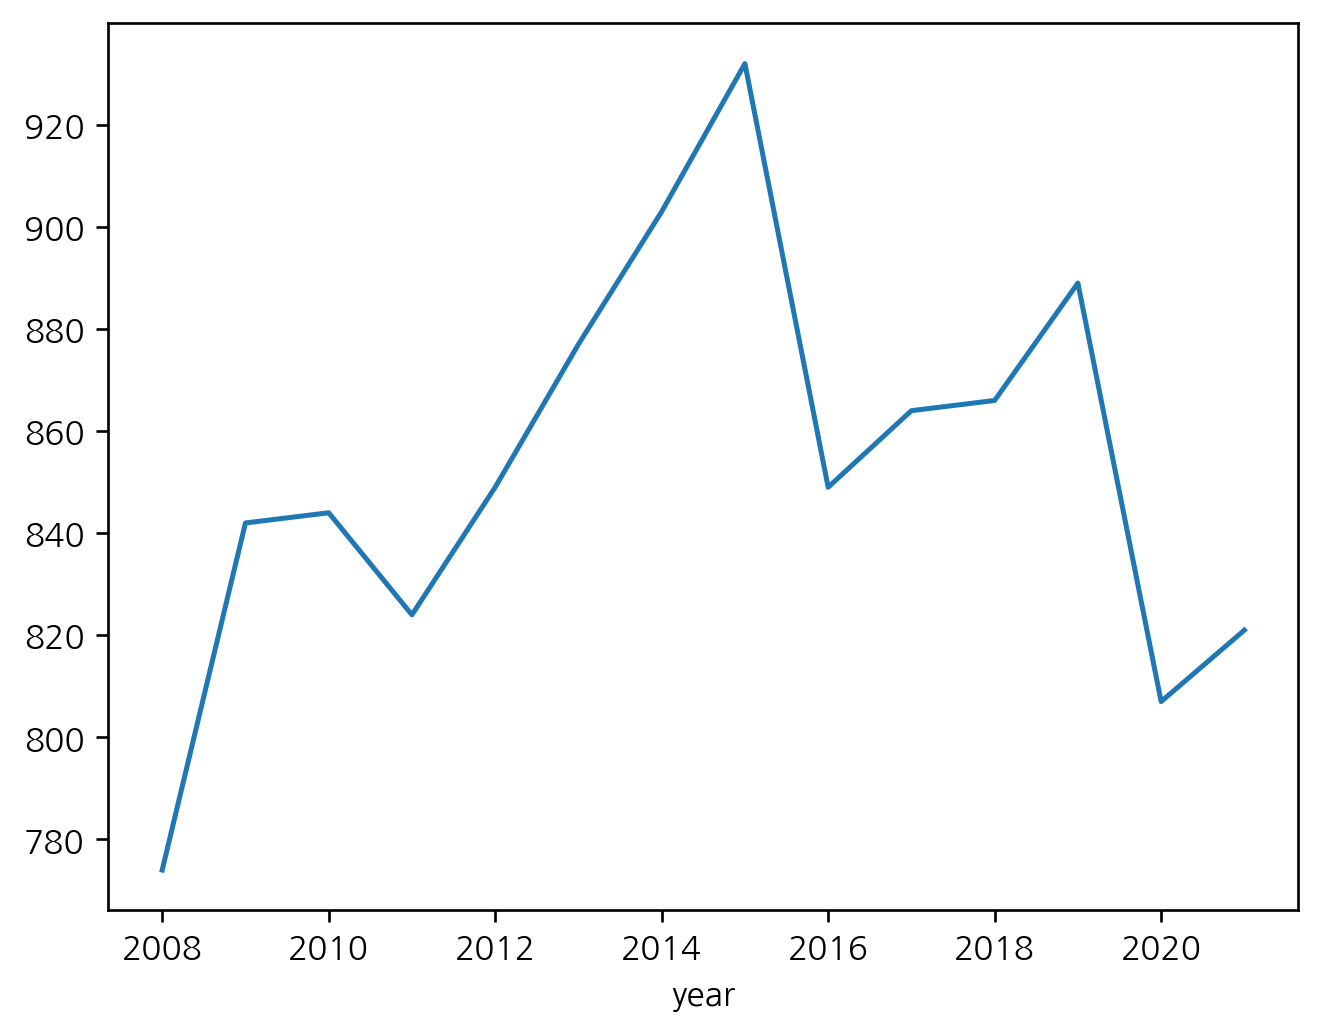

In [3]:
# 전체 분석 대상 논문 게재 추이
df['year'].value_counts().sort_index().plot()

year
2008    40
2009    42
2010    54
2011    41
2012    51
2013    51
2014    65
2015    74
2016    62
2017    65
2018    61
2019    81
2020    56
2021    83
Name: count, dtype: int64


<Axes: xlabel='year'>

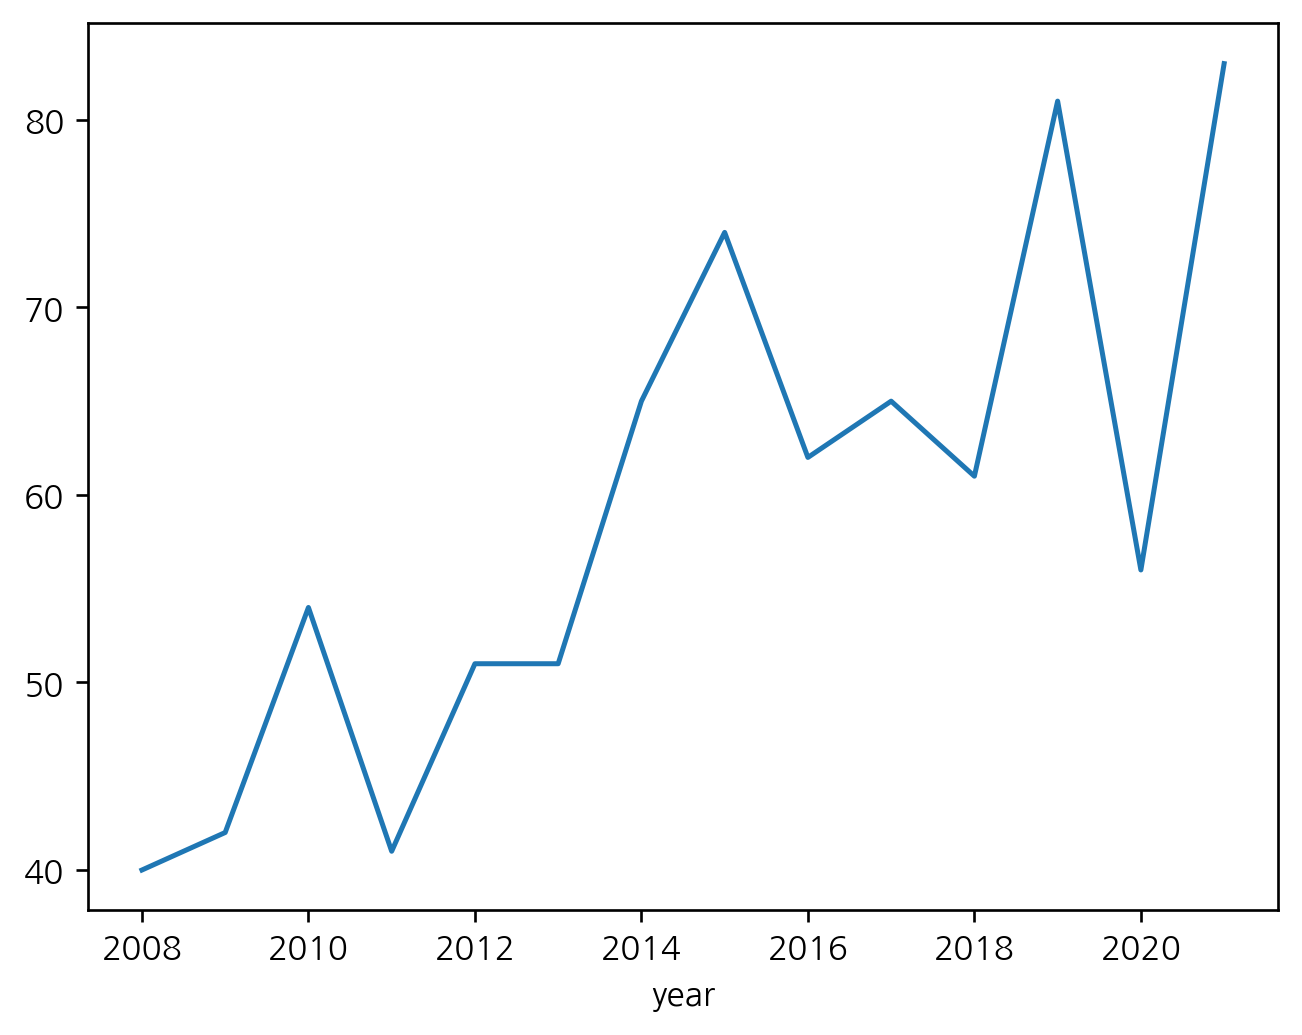

In [61]:
# 푸코 인용 추이
print(ref_fu['year'].value_counts().sort_index())
ref_fu['year'].value_counts().sort_index().plot()

In [62]:
ref_fu['classification'].value_counts(normalize=True)

classification
2.0    0.498789
1.0    0.359564
3.0    0.100484
4.0    0.041162
Name: proportion, dtype: float64

In [5]:
# pd.DataFrame(ref_fu['uri'].value_counts()).reset_index().to_excel('./stats/푸코저작_인용.xlsx')

In [6]:
pd.crosstab(ref_fu['classification'],ref_fu['year'],normalize='columns')

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
classification,,,,,,,,,,,,,,
1.0,0.425,0.357143,0.166667,0.365854,0.254902,0.333333,0.230769,0.432432,0.306452,0.276923,0.459016,0.419753,0.535714,0.421687
2.0,0.475,0.452381,0.648148,0.463415,0.568627,0.470588,0.661538,0.418919,0.580645,0.538462,0.459016,0.456790,0.321429,0.469880
3.0,0.075,0.142857,0.111111,0.097561,0.137255,0.137255,0.061538,0.054054,0.112903,0.107692,0.081967,0.098765,0.107143,0.108434
4.0,0.025,0.047619,0.074074,0.073171,0.039216,0.058824,0.046154,0.094595,0.000000,0.076923,0.000000,0.024691,0.035714,0.000000


<Axes: xlabel='year'>

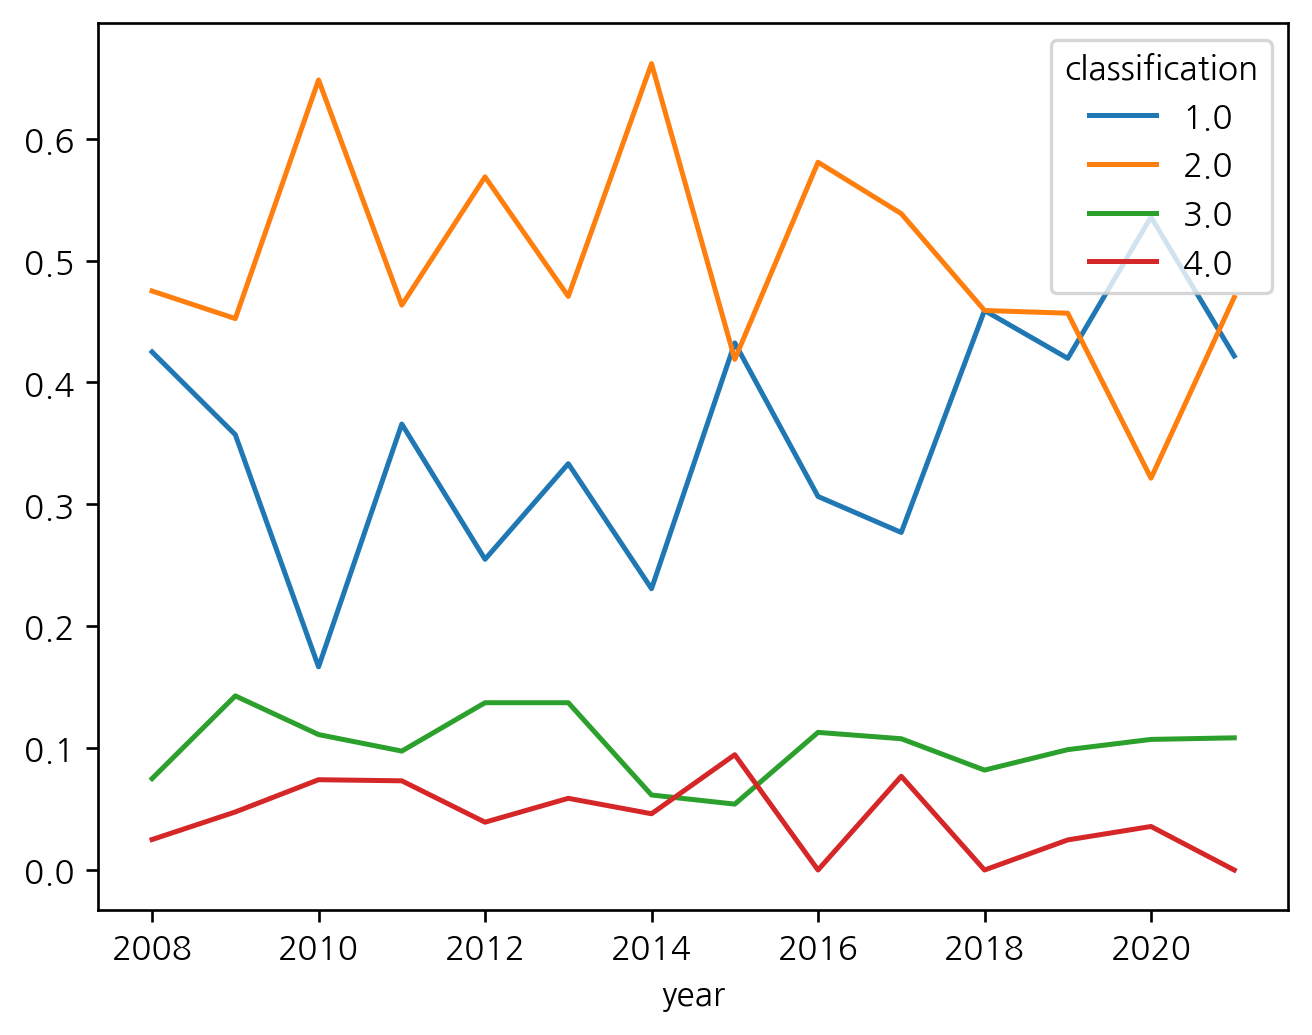

In [64]:
pd.crosstab(ref_fu['classification'],ref_fu['year'],normalize='columns').T.plot()

In [42]:
# 연도별 주요 저작 인용 패턴
pd.crosstab(ref_fu['uri'],ref_fu['year'],margins=True).to_excel('./stats/연도별_푸코저작_인용.xlsx')

In [43]:
# 성별 주요 저작 인용 패턴
pd.crosstab(ref_fu['uri'],ref_fu['gender'],margins=True).to_excel('./stats/성별_푸코저작_인용.xlsx')

### 2. 누가 인용하는가?

##### 세대

In [9]:
df.loc[~pd.isna(df['birth']),'birth'] = df[~pd.isna(df['birth'])]['birth'].map(lambda x:1900 + int(x))
df['birth']

0        1969.0
1        1971.0
2        1978.0
3        1974.0
4        1990.0
          ...  
11936    1968.0
11937    1979.0
11938    1987.0
11939    1984.0
11940    1976.0
Name: birth, Length: 11941, dtype: float64

In [10]:
# 생년 세대
df.loc[~pd.isna(df['birth']),'birth_gen'] = \
pd.cut(df.loc[~pd.isna(df['birth']),'birth'],bins=[1900,1940,1950,1960,1970,1980,1990,2000],labels=['40년생 이전','40년대생','50년대생','60년대생','70년대생','80년대생','90년생 이후'],right=False)

In [36]:
# 생년 세대 merge
ref_fu = ref_fu.merge(df[['artiId','birth_gen']])

In [39]:
# 세대별 주요 저작 인용 패턴
pd.crosstab(ref_fu['uri'],ref_fu['birth_gen'],margins=True).to_excel('./stats/세대별_푸코저작_인용.xlsx')

In [11]:
df['birth_gen'].value_counts()

birth_gen
70년대생      4488
60년대생      3729
80년대생      1516
50년대생      1045
90년생 이후     141
40년대생       107
40년생 이전      11
Name: count, dtype: int64

In [12]:
df['birth_gen'].value_counts(normalize=True)

birth_gen
70년대생      0.406632
60년대생      0.337864
80년대생      0.137356
50년대생      0.094682
90년생 이후    0.012775
40년대생      0.009695
40년생 이전    0.000997
Name: proportion, dtype: float64

In [13]:
pd.crosstab(df['birth_gen'],df['mf'])

mf,0.0,1.0
birth_gen,,
40년생 이전,11,0
40년대생,102,5
50년대생,1007,38
60년대생,3535,194
70년대생,4228,260
80년대생,1428,88
90년생 이후,134,7


In [72]:
pd.crosstab(df['birth_gen'],df['mf'],normalize='index')

mf,0.0,1.0
birth_gen,,
40년생 이전,1.000000,0.000000
40년대생,0.953271,0.046729
50년대생,0.963636,0.036364
60년대생,0.947975,0.052025
70년대생,0.942068,0.057932
80년대생,0.941953,0.058047
90년생 이후,0.950355,0.049645


In [20]:
# Continggency Table 생성
birth_mf = pd.crosstab(df['birth_gen'],df['mf'])
birth_mf = birth_mf[1:]
birth_mf.columns = ['푸코_비인용','푸코_인용']
with pd.ExcelWriter(f'./stats/푸코_인용_인구사회정보.xlsx',mode='w',engine='openpyxl') as writer:
    (birth_mf).to_excel(writer,sheet_name='세대-푸코 Table')
birth_mf

,푸코_비인용,푸코_인용
birth_gen,,
40년대생,102,5
50년대생,1007,38
60년대생,3535,194
70년대생,4228,260
80년대생,1428,88
90년생 이후,134,7


In [15]:
chi2_contingency(birth_mf)

Chi2ContingencyResult(statistic=8.681617479407551, pvalue=0.12245733787703166, dof=5, expected_freq=array([[ 101.25503356,    5.74496644],
       [ 988.89261745,   56.10738255],
       [3528.7852349 ,  200.2147651 ],
       [4247.03355705,  240.96644295],
       [1434.60402685,   81.39597315],
       [ 133.4295302 ,    7.5704698 ]]))

In [28]:
# 50 ~ 80년대생만
chi2_contingency(birth_mf[1:-1])

Chi2ContingencyResult(statistic=8.512697957036925, pvalue=0.03652303411473961, dof=3, expected_freq=array([[ 988.76507701,   56.23492299],
       [3528.3301169 ,  200.6698831 ],
       [4246.48580442,  241.51419558],
       [1434.41900167,   81.58099833]]))

##### 성별

In [18]:
df['gender'].value_counts()

gender
남    5610
여    5493
Name: count, dtype: int64

In [21]:
# Continggency Table 생성
gender_mf = pd.crosstab(df['gender'],df['mf'])
gender_mf.columns = ['푸코_비인용','푸코_인용']
with pd.ExcelWriter('./stats/푸코_인용_인구사회정보.xlsx',mode='a',engine='openpyxl') as writer:
    (gender_mf).to_excel(writer,sheet_name='성별-푸코 Table')

In [22]:
gender_mf

,푸코_비인용,푸코_인용
gender,,
남,5341,269
여,5167,326


In [23]:
chi2_contingency(gender_mf)

Chi2ContingencyResult(statistic=6.8866538123679195, pvalue=0.008684168194229994, dof=1, expected_freq=array([[5309.36503648,  300.63496352],
       [5198.63496352,  294.36503648]]))

In [24]:
pd.crosstab(df['gender'],df['mf'],normalize='index')

mf,0.0,1.0
gender,,
남,0.952050,0.047950
여,0.940652,0.059348


##### 김윤식

In [28]:
# 논문 게재 year 컬럼 추가
# ref_df = ref_df.merge(df[['artiId','year','gender']])

In [38]:
ref_kim = ref_df.loc[ref_df['author']=='김윤식'].reset_index(drop=True)

In [55]:
pd.crosstab(df['year'],df['gender'])

gender,남,여
year,,
2008,353,285
2009,436,326
2010,459,320
2011,421,341
2012,420,372
2013,443,381
2014,443,410
2015,448,443
2016,387,407


In [54]:
pd.crosstab(df['year'],df['gender'],normalize='index')

gender,남,여
year,,
2008,0.553292,0.446708
2009,0.572178,0.427822
2010,0.589217,0.410783
2011,0.552493,0.447507
2012,0.530303,0.469697
2013,0.537621,0.462379
2014,0.519343,0.480657
2015,0.502806,0.497194
2016,0.487406,0.512594


In [61]:
ref_kim.loc[ref_kim['year']==2020,'artiId'].nunique()

131

In [62]:
ref_kim.loc[ref_kim['year']==2021,'artiId'].nunique()

102

In [47]:
ref_kim.loc[(ref_kim['gender']=='남')&(ref_kim['year']==2020),'artiId'].nunique()

63

In [48]:
ref_kim.loc[(ref_kim['gender']=='남')&(ref_kim['year']==2021),'artiId'].nunique()

42

In [64]:
ref_kim.loc[(ref_kim['gender']=='여')&(ref_kim['year']==2020),'artiId'].nunique() / 131

0.3969465648854962

In [63]:
ref_kim.loc[(ref_kim['gender']=='여')&(ref_kim['year']==2021),'artiId'].nunique() / 102

0.38235294117647056

In [65]:
ref_df

,refebibl-id,artiId,type-code,type-name,title,uri,author,lod_author,classification,pubilisher,...,degree,university,department,url,citation-day,site-name,registration-day,conference-name,year,gender
0,REF019661669,ART001320254,3,단행본,- 卷 一 第 一編 地文地理,NaN,장지연,NaN,NaN,大韓新地誌,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,여
1,REF019661674,ART001320254,1,학술지(정기간행물),1910년대 박은식의 사상 변화와 역사인식,NaN,김도향,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,여
2,REF019661680,ART001320254,1,학술지(정기간행물),근대 한국 신화학의 태동― 단군 담론을 중심으로 ―,NaN,하정현,NaN,NaN,한국종교학회,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,여
3,REF019661679,ART001320254,1,학술지(정기간행물),근대계몽기 단군 신화의 탈신화화와 재신화화,NaN,조현설,NaN,NaN,민족문학사학회,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,여
4,REF019661681,ART001320254,5,학위논문,근대계몽기 소설에 나타난 우의성 연구,NaN,홍순애,NaN,NaN,NaN,...,박사,서강대학교,NaN,NaN,NaN,NaN,NaN,NaN,2009,여
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326560,REF060835606,ART002792436,3,단행본,내재하는 아시아,NaN,다케우치 요시미,"Takeuchi, Yoshimi",NaN,휴머니스트,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,남
326561,REF060835607,ART002792436,3,단행본,‘Historical Significance of Tagore’s 1924 Chin...,NaN,Wei Liming,"Wei, Liming",NaN,SAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,남
326562,REF058438440,ART002714777,3,단행본,여자들이 글 못 쓰게 만드는 방법,NaN,조애나 러스,"Russ, Joanna",NaN,낮은산,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
326563,REF058438438,ART002714777,3,단행본,The Country You Have Never Seen: Essays and Re...,NaN,Joanna Russ,"Russ, Joanna",NaN,Liverpool University Press,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
